In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np

In [3]:
iris_df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", 
            names=["sepal_length", "sepal_width", "petal_length", "petal_width", "species"])
krkopt_df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/chess/king-rook-vs-king/krkopt.data",
            names=["White_King_file", "White_King_rank", "White_Rook_file", "White_Rook_rank", "Black_King_file", "Black_King_rank", "target"])
mushroom_df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data", 
            names=["poisonous", "cap-shape", "cap-surface", "cap-color", "bruises", "odor", "gill-attachment", "gill-spacing", "gill-size", "gill-color", "stalk-shape", "stalk-root", "stalk-surface-above-ring", "stalk-surface-below-ring", "stalk-color-above-ring", "stalk-color-below-ring", "veil-type", "veil-color", "ring-number", "ring-type", "spore-print-color", "population", "habitat"])

In [4]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()

In [5]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
iris_df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [8]:
iris_df["species"] = lb_make.fit_transform(iris_df["species"])

In [9]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [10]:
iris_df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species           int64
dtype: object

In [11]:
krkopt_df.head()

,White_King_file,White_King_rank,White_Rook_file,White_Rook_rank,Black_King_file,Black_King_rank,target
0,a,1,b,3,c,2,draw
1,a,1,c,1,c,2,draw
2,a,1,c,1,d,1,draw
3,a,1,c,1,d,2,draw
4,a,1,c,2,c,1,draw


In [12]:
krkopt_df.dtypes

White_King_file    object
White_King_rank     int64
White_Rook_file    object
White_Rook_rank     int64
Black_King_file    object
Black_King_rank     int64
target             object
dtype: object

In [13]:
krkopt_df["White_King_file"] = lb_make.fit_transform(krkopt_df["White_King_file"])

krkopt_df["White_Rook_file"] = lb_make.fit_transform(krkopt_df["White_Rook_file"])

krkopt_df["Black_King_file"] = lb_make.fit_transform(krkopt_df["Black_King_file"])

krkopt_df["target"] = lb_make.fit_transform(krkopt_df["target"])

In [14]:
krkopt_df.head()

,White_King_file,White_King_rank,White_Rook_file,White_Rook_rank,Black_King_file,Black_King_rank,target
0,0,1,1,3,2,2,0
1,0,1,2,1,2,2,0
2,0,1,2,1,3,1,0
3,0,1,2,1,3,2,0
4,0,1,2,2,2,1,0


In [15]:
mushroom_df.head()

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [16]:
mushroom_df.dtypes

poisonous                   object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [17]:
for col in list(mushroom_df):
    mushroom_df[col] = lb_make.fit_transform(mushroom_df[col])

In [18]:
mushroom_df.head()

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [19]:
mushroom_df.dtypes

poisonous                   int64
cap-shape                   int64
cap-surface                 int64
cap-color                   int64
bruises                     int64
odor                        int64
gill-attachment             int64
gill-spacing                int64
gill-size                   int64
gill-color                  int64
stalk-shape                 int64
stalk-root                  int64
stalk-surface-above-ring    int64
stalk-surface-below-ring    int64
stalk-color-above-ring      int64
stalk-color-below-ring      int64
veil-type                   int64
veil-color                  int64
ring-number                 int64
ring-type                   int64
spore-print-color           int64
population                  int64
habitat                     int64
dtype: object

In [20]:
datas = {
    "iris" : ["species", iris_df],
    "krkopt" : ["target", krkopt_df],
    "mushroom" : ["poisonous", mushroom_df]
}

datasets = {}
for name, target in datas.items():   
    #x = target[1].to_numpy()[:, list(range(N)).remove(target[0])]
    x = target[1].loc()[:, target[1].columns != target[0]]
    y = target[1].loc()[:, target[0]]
    N = target[1].shape[0]
    
    datasets[name] = [
        x,
        y,
        N
    ]

#datasets = {
#    "iris" : [iris_df.to_numpy()[:, 0:4], iris_df.to_numpy()[:, 4], iris_df.shape[0]],
#    "krkopt" : [krkopt_df.to_numpy()[:, 0:6], krkopt_df.to_numpy()[:, 6], krkopt_df.shape[0]],
#    "mushroom" : [mushroom_df.to_numpy()[:, 1:22], mushroom_df.to_numpy()[:, 0], mushroom_df.shape[0]]
#}

In [21]:
iris_df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species           int64
dtype: object

=== iris ===
150 rows


/home/romgrelier/.local/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


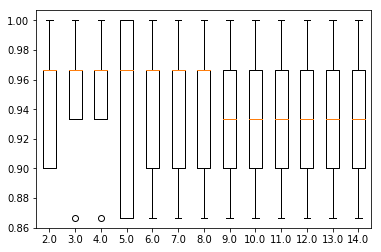

=== krkopt ===
28056 rows


/home/romgrelier/.local/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


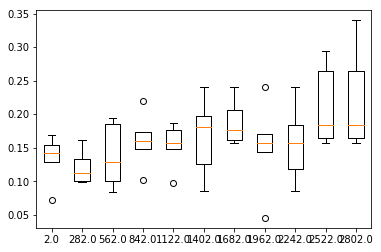

=== mushroom ===
8124 rows


/home/romgrelier/.local/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


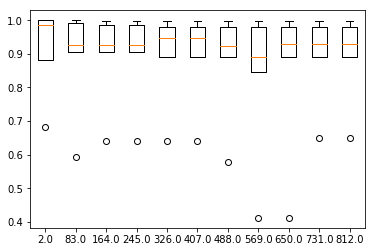

In [22]:
from sklearn import tree
from sklearn import ensemble
from sklearn import svm
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

for name, df in datasets.items():
    x_train = df[0]
    y_train = df[1]
    N = df[2]
    
    print(f"=== {name} ===")
    print(f"{N} rows")
    
    score_record = []
    leaf_count = []
    
    # build classifier
    clfs = {}
    for i in np.arange(2, N * 0.1, int((N * 0.1)/10)):
        clfs[f"Decision Tree min_samples_leaf={int(i)}"] = tree.DecisionTreeClassifier(min_samples_leaf=int(i))
        leaf_count.append(i)

    # build models
    for name, clf in clfs.items():
        scores = cross_val_score(clf, x_train, y_train, cv=5)
        score_record.append(scores)

    fig = plt.figure()
    plt.boxplot(score_record)
    ax = fig.add_subplot(111)
    ax.set_xticklabels(leaf_count)
    plt.show()
